In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense , Conv2D, MaxPool2D, Dropout

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test, y_test)=cifar10.load_data()

In [5]:
classes_name=['airplan','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
x_train.max()

255

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

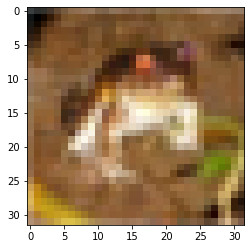

In [10]:
plt.imshow(x_train[0])

In [11]:
y_train[0]

array([6], dtype=uint8)

## Build CNN Model

In [12]:
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [15]:
history=model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 92s 18ms/step - loss: 1.4591 - sparse_categorical_accuracy: 0.4744 - val_loss: 1.1794 - val_sparse_categorical_accuracy: 0.5822
Epoch 2/10
5000/5000 [==============================] - 90s 18ms/step - loss: 1.1661 - sparse_categorical_accuracy: 0.5857 - val_loss: 1.0734 - val_sparse_categorical_accuracy: 0.6153
Epoch 3/10
5000/5000 [==============================] - 89s 18ms/step - loss: 1.0491 - sparse_categorical_accuracy: 0.6264 - val_loss: 1.0011 - val_sparse_categorical_accuracy: 0.6382
Epoch 4/10
5000/5000 [==============================] - 90s 18ms/step - loss: 0.9815 - sparse_categorical_accuracy: 0.6503 - val_loss: 0.9797 - val_sparse_categorical_accuracy: 0.6513
Epoch 5/10
5000/5000 [==============================] - 91s 18ms/step - loss: 0.9274 - sparse_categorical_accuracy: 0.6721 - val_loss: 0.9453 - val_sparse_categorical_accuracy: 0.6681
Epoch 6/10
5000/5000 [==============================] - 92s 18ms/step - loss: 0.

In [16]:
history.history

{'loss': [1.4590576887130737,
  1.166129231452942,
  1.0490801334381104,
  0.981496274471283,
  0.9273675680160522,
  0.8721631169319153,
  0.8388246893882751,
  0.8039808869361877,
  0.7681734561920166,
  0.7424770593643188],
 'sparse_categorical_accuracy': [0.47440001368522644,
  0.5856599807739258,
  0.6263599991798401,
  0.6503000259399414,
  0.6720600128173828,
  0.6900399923324585,
  0.7031999826431274,
  0.7135400176048279,
  0.7271400094032288,
  0.7359600067138672],
 'val_loss': [1.1793949604034424,
  1.0734069347381592,
  1.0011045932769775,
  0.9796897172927856,
  0.945293664932251,
  0.9566307663917542,
  0.9239537119865417,
  0.9181146621704102,
  0.9087111353874207,
  0.9332393407821655],
 'val_sparse_categorical_accuracy': [0.5821999907493591,
  0.6152999997138977,
  0.6381999850273132,
  0.6513000130653381,
  0.6680999994277954,
  0.6646999716758728,
  0.6773999929428101,
  0.6854000091552734,
  0.6843000054359436,
  0.6822999715805054]}

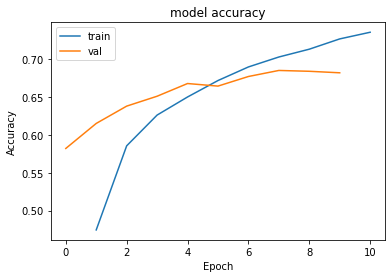

In [19]:
epoch_range=range(1,11)
plt.plot(epoch_range, history.history["sparse_categorical_accuracy"])
plt.plot(epoch_range, history.history["val_sparse_categorical_accuracy"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()

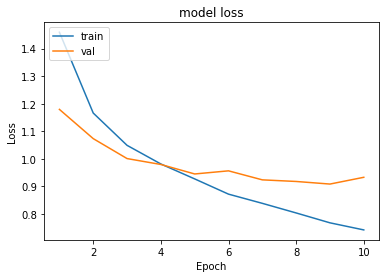

In [21]:
epoch_range=range(1,11)
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()